Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_13 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_14 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5010      
Total params: 898,510
Trainable params: 898,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
500/500 [==============================] - 5s 9ms/step - loss: 0.5075 - accuracy: 0.8384 - val_loss: 0.4604 - val_accuracy: 0.8624
Epoch 2/10
500/500 [==============================] - 5s 9ms/step - loss: 0.2058 - accuracy: 0.9334

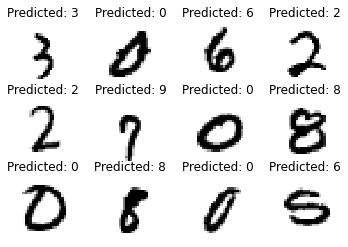

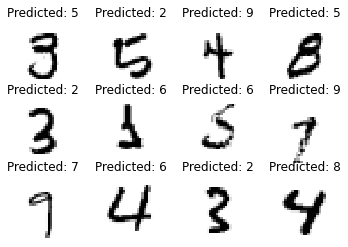

In [4]:
import tensorflow.keras as keras
import tensorflow.compat.v1 as tf

import numpy as np

with np.load("/content/sample_data/mnist.npz", allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

sample = np.random.randint(60000, size=5000)
x_train = x_train[sample]
y_train = y_train[sample]

# Set numeric type to float32 from uint8
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255


x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)



model = keras.Sequential([
    keras.layers.Dense(500, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
  ])

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
print(model.summary())
trained = model.fit(
    x_train,
    y_train, 
    epochs=10, 
    batch_size=10, 
    validation_data=(x_test, y_test),
    )
predicted = model.predict(x_test)
predicted = np.array([p.argmax() for p in predicted])
y_test = np.array([p.argmax() for p in y_test])

# On redimensionne les données sous forme d'images
images = x_test.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)


# On affiche les images avec la prédiction associée
import matplotlib.pyplot as plt
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %i' % predicted[value])

plt.show()

# Gestion des erreurs
# on récupère les données mal prédites
misclass = (y_test != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %i' % misclass_predicted[value])

plt.show()

